In [1]:
%matplotlib inline
from tqdm import trange
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data', one_hot=True)

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz


In [5]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [6]:
keep_prob = tf.placeholder(tf.float32)

In [7]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01)) # input : 이미지 1개당  28*28 pixel, 뉴런 갯수 256개
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01)) 
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev =0.01))
model = tf.matmul(L2, W3)

In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

In [9]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size) # 550

In [15]:
for epoch in trange(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict ={X:batch_xs, Y:batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    print("Epoch: %04d" % (epoch+1), "Avg. cost={:.3f}".format(total_cost / total_batch))
print("훈련 완료")


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Epoch: 0001 Avg. cost=0.020



  3%|██▊                                                                                | 1/30 [00:03<01:45,  3.64s/it]

Epoch: 0002 Avg. cost=0.021



  7%|█████▌                                                                             | 2/30 [00:06<01:38,  3.51s/it]

Epoch: 0003 Avg. cost=0.017



 10%|████████▎                                                                          | 3/30 [00:10<01:32,  3.43s/it]

Epoch: 0004 Avg. cost=0.019



 13%|███████████                                                                        | 4/30 [00:13<01:27,  3.36s/it]

Epoch: 0005 Avg. cost=0.019



 17%|█████████████▊                                                                     | 5/30 [00:16<01:23,  3.35s/it]

Epoch: 0006 Avg. cost=0.018



 20%|████████████████▌                                                                  | 6/30 [00:19<01:19,  3.29s/it]

Epoch: 0007 Avg. cost=0.015



 23%|███████████████████▎                                                               | 7/30 [00:22<01:11,  3.10s/it]

Epoch: 0008 Avg. cost=0.016



 27%|██████████████████████▏                                                            | 8/30 [00:25<01:09,  3.16s/it]

Epoch: 0009 Avg. cost=0.017



 30%|████████████████████████▉                                                          | 9/30 [00:29<01:07,  3.22s/it]

Epoch: 0010 Avg. cost=0.017



 33%|███████████████████████████▎                                                      | 10/30 [00:32<01:04,  3.21s/it]

Epoch: 0011 Avg. cost=0.014



 37%|██████████████████████████████                                                    | 11/30 [00:35<01:00,  3.18s/it]

Epoch: 0012 Avg. cost=0.015



 40%|████████████████████████████████▊                                                 | 12/30 [00:38<00:57,  3.21s/it]

Epoch: 0013 Avg. cost=0.016



 43%|███████████████████████████████████▌                                              | 13/30 [00:41<00:54,  3.23s/it]

Epoch: 0014 Avg. cost=0.014



 47%|██████████████████████████████████████▎                                           | 14/30 [00:45<00:51,  3.23s/it]

Epoch: 0015 Avg. cost=0.014



 50%|█████████████████████████████████████████                                         | 15/30 [00:48<00:48,  3.23s/it]

Epoch: 0016 Avg. cost=0.015



 53%|███████████████████████████████████████████▋                                      | 16/30 [00:51<00:45,  3.23s/it]

Epoch: 0017 Avg. cost=0.014



 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:54<00:41,  3.23s/it]

Epoch: 0018 Avg. cost=0.014



 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:58<00:38,  3.21s/it]

Epoch: 0019 Avg. cost=0.013



 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:01<00:35,  3.20s/it]

Epoch: 0020 Avg. cost=0.015



 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:04<00:31,  3.20s/it]

Epoch: 0021 Avg. cost=0.014



 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [01:07<00:28,  3.20s/it]

Epoch: 0022 Avg. cost=0.013



 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [01:10<00:25,  3.22s/it]

Epoch: 0023 Avg. cost=0.011



 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [01:14<00:22,  3.20s/it]

Epoch: 0024 Avg. cost=0.013



 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [01:17<00:19,  3.20s/it]

Epoch: 0025 Avg. cost=0.011



 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [01:20<00:15,  3.19s/it]

Epoch: 0026 Avg. cost=0.013



 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [01:23<00:12,  3.19s/it]

Epoch: 0027 Avg. cost=0.013



 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [01:26<00:09,  3.20s/it]

Epoch: 0028 Avg. cost=0.012



 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [01:30<00:06,  3.21s/it]

Epoch: 0029 Avg. cost=0.013



 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [01:33<00:03,  3.20s/it]

Epoch: 0030 Avg. cost=0.013



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:36<00:00,  3.19s/it]


훈련 완료


In [17]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("     test 정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

     정확도 :  0.9834


In [22]:
print("     train 정확도 : ", sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:0.8}))

     정확도 :  0.9967091


In [23]:
labels = sess.run(model, feed_dict = {X:mnist.test.images, Y: mnist.test.labels, keep_prob:1})

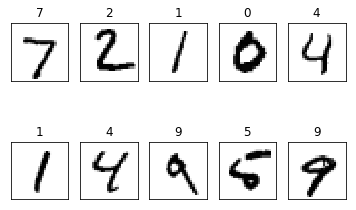

In [25]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [26]:
sess.close()